## Welcome to Data Engineering Workshop

# Orientation and Setup

# Requirements

## Your computer
* Docker
* Command Line Interface (CLI)


## You
* Basic Shell

# Tools

## Outline

### Part 0 : Orientation and setup
### Part 1 : Introduction
### Part 2 : Requirements and Tools
    Task 0: Prerequisites
    Task 1 : Run Docker containers
    Task 2 : Package and run a custom app using Docker
    Task 3 : Modify a running app
    Kahoot BREAK

### Break
 
### Part 3 : Deploy your App
 
### Part 4 : Exercises
 


## Two main types:
   * Virtual Machines
       * Virtualbox
       * VMware
       * AWS, Google Compute Engine, ...
   * Containers:
       * Docker
       * Singularity


## Main idea -- isolate the computing environment
   * Allow regenerating computing environments
   * Allow sharing your computing environments

# Virtual Machines Vs. Containers
![containers_vs_VM](./images/containers-versus-virtual-machines-docker-inc-rightscale.jpg)

## Virtual Machines
* emulate whole computer system (software + hardware)
* run on top of a physical machine using a hypervisor
* _hypervisor_ shares and manages hardware of the host and executes the guest operating system
* guest machines are completely isolated and have dedicated resourcesc

# Virtual Machines Vs. Containers
![containers_vs_VM](./images/containers-versus-virtual-machines-docker-inc-rightscale.jpg)

## Docker Containers
* share the host system's kernel with other containers
* each container gets its own isolated user space
* only bins and libs are created from scratch
* containers are very lightweight and fast to start up

# Introduction

## Why do we use containers?

## What are the various types of container based environments?

## How to use Docker?

## Container Technologies
* Isolate the computing environments
* Provide a mechanism to encapsulate environments in a self-contained unit that can run anywhere

## Why do we need containers? 

## Science Reproducibility

* Each Project in a lab depends on complex software environments
    * Operating system
    * drivers
    * software dependencies: Python/MATLAB/R+libraries
* We try to avoid
    * the computer I used was shut down a year ago, can't rerun the results from my publication...
    * the analysis were run by my student, have no idea where and how...
    * etc.
* Collaboration with your colleagues
    * Sharing your code or using a repository might not be enough
    * We try to avoid
        * Well, I forgot to mention that you have to use Clang, gcc never worked for me...
        * don't see any reason why it shouldn't work on Windows...(I actually have no idea about Windows, but won't say it...)
        * it works on my coputer...
        * etc.
* Freedom to experiment!

In [ ]:
Major infrastructure shifts

90s: Mainframe to PC
00s: Baremetal to Virtual
10s: Datacenter to cloud
Host to container (serverless)


In [ ]:
includes everyone from developer to sys admins

In [ ]:
Docker is all about speed.
Develop faster
build faster 
test faster
containers reduce complexity

# Docker
* leading software container platform
* an open-source project
* it runs now on Mac OS x and Windows (you don't have to run VM!)

## Testing your Docker Installation:
`docker run hello-world`

## Interesting tutorials and blog posts:

* [A beginner friendly intro to VMs and Docker](https://medium.freecodecamp.org/a-beginner-friendly-introduction-to-containers-vms-and-docker-79a9e3e119b)
* [Intro to Docker from Neurohackweek](https://neurohackweek.github.io/docker-for-scientists/)
* [Understanding Images](https://code.tutsplus.com/tutorials/docker-from-the-ground-up-understanding-images--cms-28165)
* [Cloud Native Trail Map](https://raw.githubusercontent.com/cncf/landscape/master/trail_map/CNCF_TrailMap_latest.png)
* [Cloud Native Landscapes](https://raw.githubusercontent.com/cncf/landscape/master/landscape/CloudNativeLandscape_latest.png)


# Break

# Deploy your App

# Exercises

# Docker: Using existing images

* Docker Hub -- repositories to share Docker images

* managing images:
``` 
$ docker pull ubuntu
$ docker images
# remove images
$ docker rmi <image_id>
# remove dangling images
$ docker rmi $(docker images | grep "^<none>" | awk '{print $3}') 
```

* running containers
```
$ docker run ubuntu
$ docker run ubuntu echo "hello from your container"
```

* `-it` option: running interactively
```
$ docker run -it ubuntu bash
```

# Docker: Using existing images

* managing containers
```
# list currently running containers
$ docker ps
# list created containers
$ docker ps -a
# remove containers
$ docker rm <container_id>
# remove all stops containers
$ docker rm $(docker ps -a -q)
```

* `--rm` option: automatically removing the container when it exits
```
$ docker run -it --rm ubuntu
```

* adding a data volume to a container (you can use multiple times to mount multiple data volumes)
```
# you should use absolute path to the LocalDirectory
$ docker run -it --rm -v LocalDirectory:/src ubuntu
# read only mode
$ docker run -it --rm -v LocalDirectory:/src:ro ubuntu
# you can mount multiple data volumes
# the directory `temp` doesn't have to exist and will be created
$ docker run -it --rm -v LocalDirectory:/src -v TempLocalDirectory:/temp ubuntu
```

# Docker: Installing software with Dockerfile

* Create a new directory 
```
$ mkdir mydockerbuild
$ cd mydockerbuild
```

* Dockerfile content:
```
FROM ubuntu:latest
RUN apt-get update -y && apt-get install git emacs
```

* Building a new container:
```
$ docker build -t my_new_container .
```

* Running your new container:
```
$ docker run -it --rm my_new_container
```

* Within container you can try:
```
$ git
$ emacs
```

## Census Income Data Set 

In [8]:
# Import libraries necessary for this project

# Linear Algebra
import numpy as np

# Data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from __future__ import division

# Pretty display for notebooks
%matplotlib inline

# Getting the Data

In [10]:
# Load the Census dataset
orig_data = pd.read_csv("./resources/dataset/adult.data",header=None)
orig_data.columns = ['age','workclass','fnlwgt','education_level','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [12]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education_level    32561 non-null object
education-num      32561 non-null int64
marital-status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
capital-gain       32561 non-null int64
capital-loss       32561 non-null int64
hours-per-week     32561 non-null int64
native-country     32561 non-null object
income             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Exploration

The modified census dataset consists of approximately 32,000 data points, with each datapoint having 13 features. This dataset is a modified version of the dataset published in the paper "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", by Ron Kohavi. You may find this paper online, with the original dataset hosted on UCI.

**The dataset has 32561 examples and 14 features + the target variable (income).** 6 features are integers and 8 are objects.

#### Features

**age**: Age

**workclass**: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)

**fnlwgt**: continuous

**education_level**: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)

**education-num**: Number of educational years completed

**marital-status**: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)

**occupation**: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)

**relationship**: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)

**race**: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)

**sex**: Sex (Female, Male)

**capital-gain**: Monetary Capital Gains

**capital-loss**: Monetary Capital Losses

**hours-per-week**: Average Hours Per Week Worked

**native-country**: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

### Target Variable

**income**: Income Class (<=50K, >50K)

In [187]:
orig_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass2,education_level2,marital_status2,occupation2,relationship2,race2,sex2,native-country2,income2
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,3.309972,4.424465,2.083781,5.666411,2.542397,1.221707,1.330795,2.385983,1.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,1.225728,3.453582,1.251381,3.386119,1.437431,0.627348,0.470506,5.276544,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,3.000000,3.000000,2.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,3.000000,6.000000,2.000000,8.000000,4.000000,1.000000,2.000000,1.000000,1.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,9.000000,16.000000,7.000000,15.000000,6.000000,5.000000,2.000000,43.000000,2.000000


In [17]:
# Success - Display the first record
display(orig_data.head(n=8))

,age,workclass,fnlwgt,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [18]:
total = orig_data.isnull().sum().sort_values(ascending=False)
percent1 = orig_data.isnull().sum() / orig_data.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
income,0,0.0
native-country,0,0.0
hours-per-week,0,0.0
capital-loss,0,0.0
capital-gain,0,0.0


**What features can contribute to income?**

**1. Age and Sex**

/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


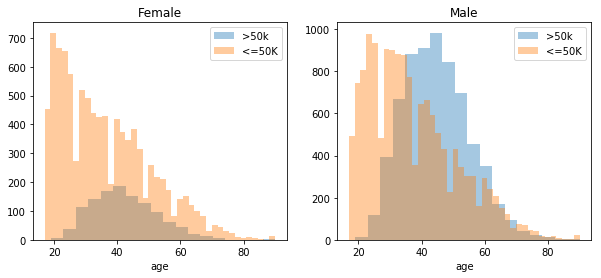

In [38]:
n_greater_50k = '>50k'
n_at_most_50k = '<=50K'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = orig_data[orig_data['sex']==' Female']
men = orig_data[orig_data['sex']==' Male']
ax = sns.distplot(women[women.income ==' >50K'].age.dropna(), bins=18, label = n_greater_50k, ax = axes[0], kde =False)
ax = sns.distplot(women[women.income ==' <=50K'].age.dropna(), bins=40, label = n_at_most_50k, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men.income ==' >50K'].age.dropna(), bins=18, label = n_greater_50k, ax = axes[1], kde = False)
ax = sns.distplot(men[men.income ==' <=50K'].age.dropna(), bins=40, label = n_at_most_50k, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Men have a high probability of earning >50K when they are between 30 and 60 years old. 
This is also true for women. However, for women the probability of earning >50K are higher between 25 and 50 years old. 

Since there seem to be **certain ages, which have increased odds of higher income**, I will create age groups later on.

**2. Workclass,Education level, Education num**

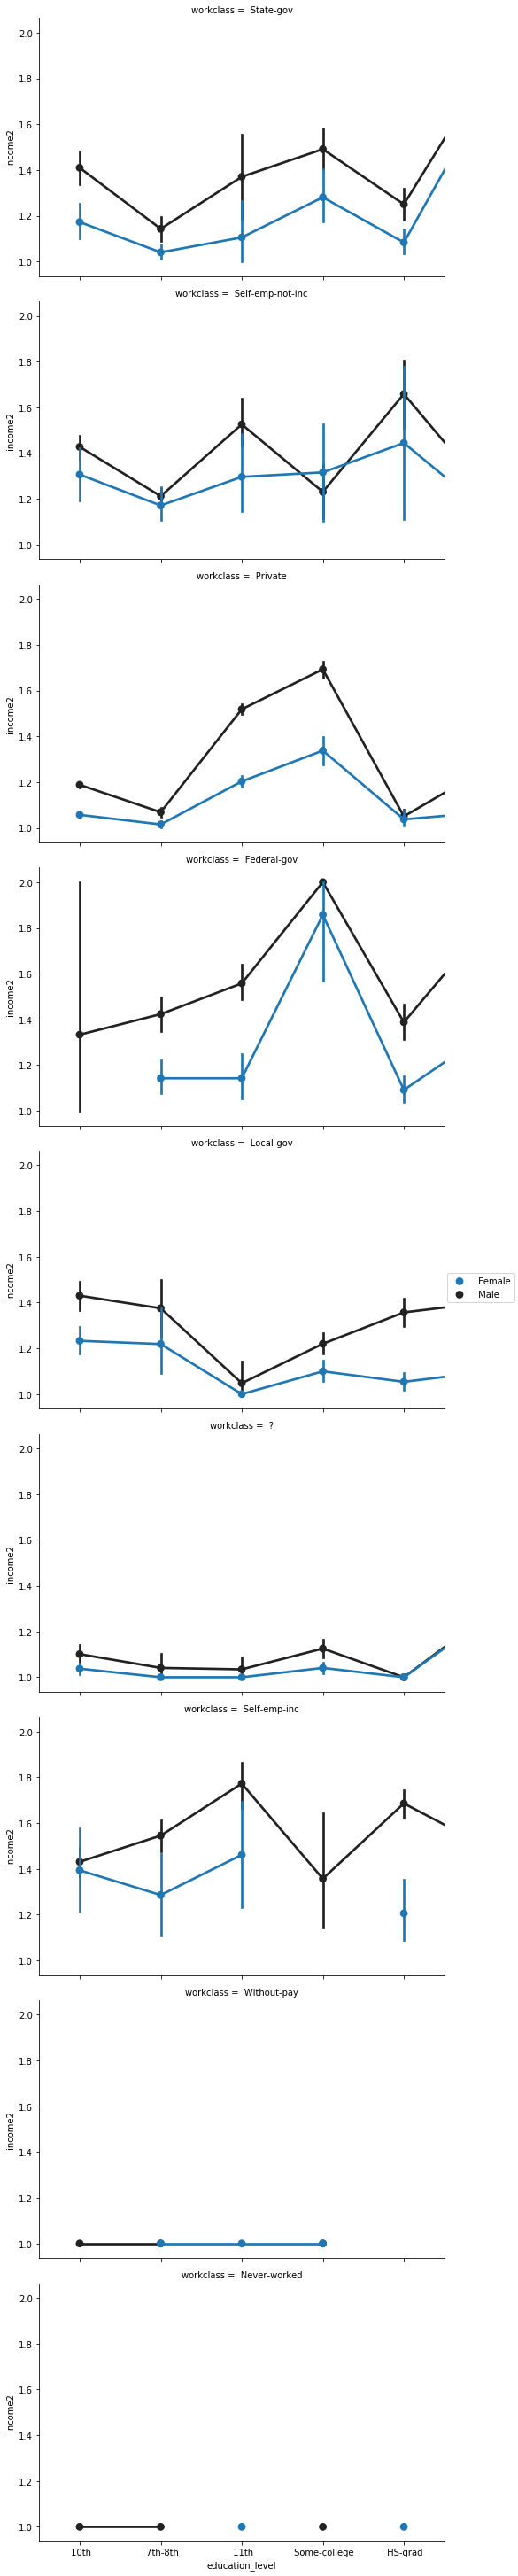

In [98]:
FacetGrid = sns.FacetGrid(orig_data, row='workclass', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'education_level', 'income2', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Workclass seems to be correlated with income, depending on the gender.

**3. workclass**

In [131]:
orig_data['age_cat'].value_counts()

31_40     8546
21_30     8162
41_50     6983
51_60     4128
11_20     2410
61_70     1792
71_100     540
0_10         0
Name: age_cat, dtype: int64

 State-gov 1                             
 Self-emp-not-inc 2                             
 Private 3                             
 Federal-gov 4                             
 Local-gov 5                             
 ?       6                             
 Self-emp-inc 7                             
 Without-pay 8                             
 Never-worked 9                             


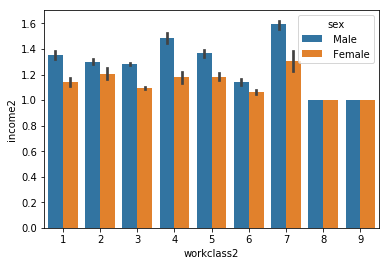

In [182]:
sns.barplot(x='workclass2', y='income2', data=orig_data, hue="sex")
# print( "{:<8} {:<30}".format('Key','Label'))
for keys in workclass:
    label = workclass[keys]
    print("{:<8} {:<30}".format(keys, label))

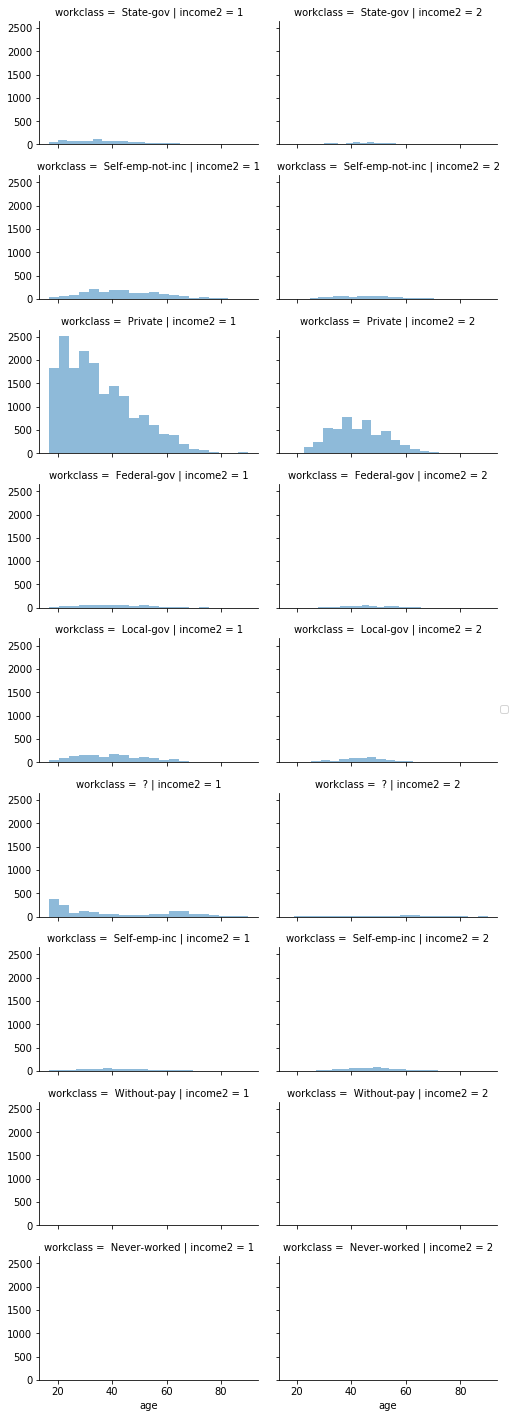

In [105]:
grid = sns.FacetGrid(orig_data, col='income2', row='workclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

workclass is contributing to a persons income especially if this person is self-employed.

Working for the federal government shows a high probability of earning an income being <=50K and low probability of earning an income >50K

**4. education_level**

 Bachelors 1                             
 HS-grad 2                             
 11th    3                             
 Masters 4                             
 9th     5                             
 Some-college 6                             
 Assoc-acdm 7                             
 Assoc-voc 8                             
 7th-8th 9                             
 Doctorate 10                            
 Prof-school 11                            
 5th-6th 12                            
 10th    13                            
 1st-4th 14                            
 Preschool 15                            
 12th    16                            


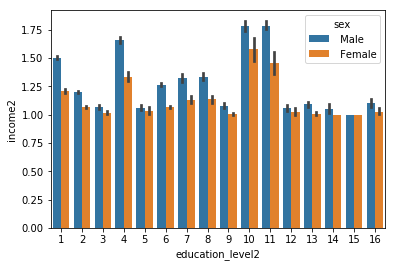

In [186]:
sns.barplot(x='education_level2', y='income2', data=orig_data,c)
for keys in education_level:
    label = education_level[keys]
    print("{:<8} {:<30}".format(keys, label))

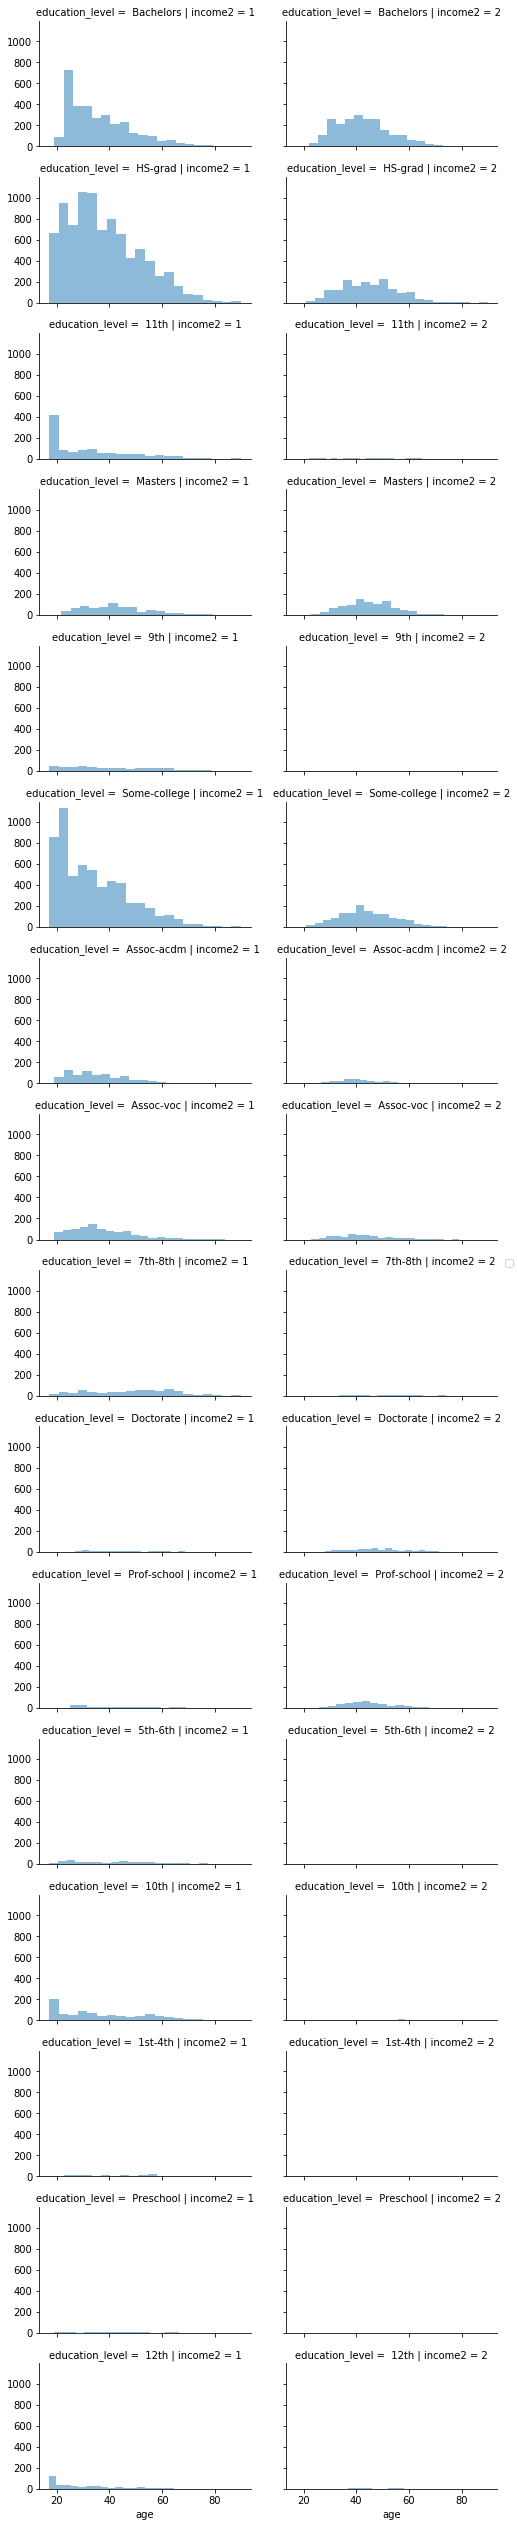

In [139]:
grid = sns.FacetGrid(orig_data, col='income2', row='education_level', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**5. marital-status**

 Never-married 1                             
 Married-civ-spouse 2                             
 Divorced 3                             
 Married-spouse-absent 4                             
 Separated 5                             
 Married-AF-spouse 6                             
 Widowed 7                             


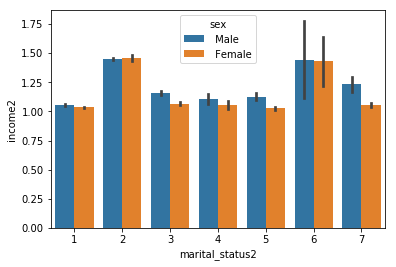

In [191]:
sns.barplot(x='marital_status2', y='income2', data=orig_data,  hue='sex')
for keys in marital_status:
    label = marital_status[keys]
    print("{:<8} {:<30}".format(keys, label))

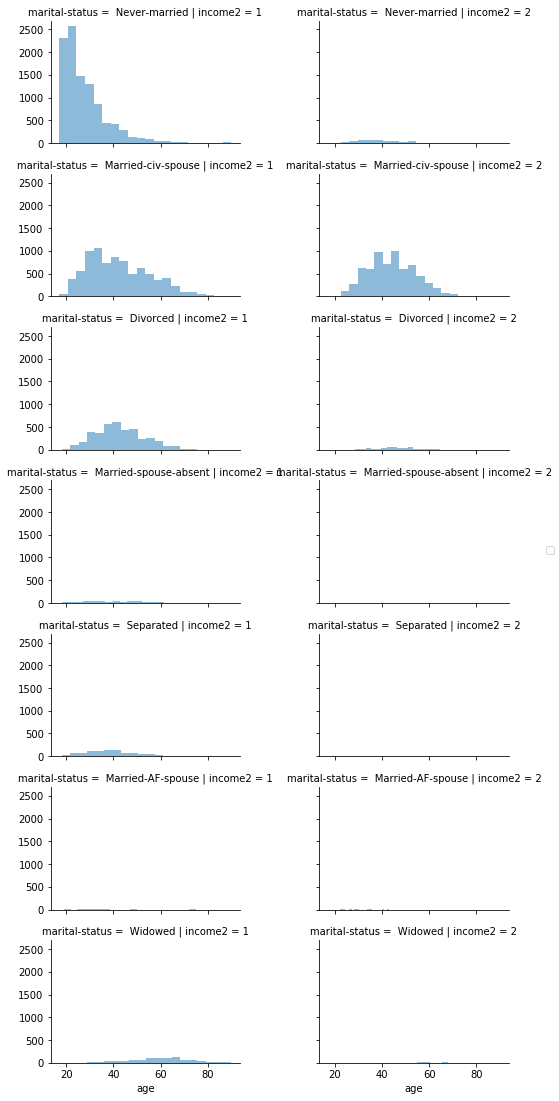

In [140]:
grid = sns.FacetGrid(orig_data, col='income2', row='marital-status', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**6. occupation**

 Adm-clerical 1                             
 Exec-managerial 2                             
 Handlers-cleaners 3                             
 Prof-specialty 4                             
 Other-service 5                             
 Sales   6                             
 Craft-repair 7                             
 Transport-moving 8                             
 Farming-fishing 9                             
 Machine-op-inspct 10                            
 Tech-support 11                            
 ?       12                            
 Protective-serv 13                            
 Armed-Forces 14                            
 Priv-house-serv 15                            


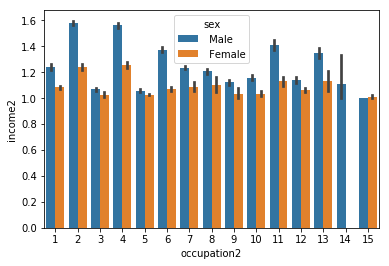

In [192]:
sns.barplot(x='occupation2', y='income2', data=orig_data, hue='sex')
for keys in occupation:
    label = occupation[keys]
    print("{:<8} {:<30}".format(keys, label))

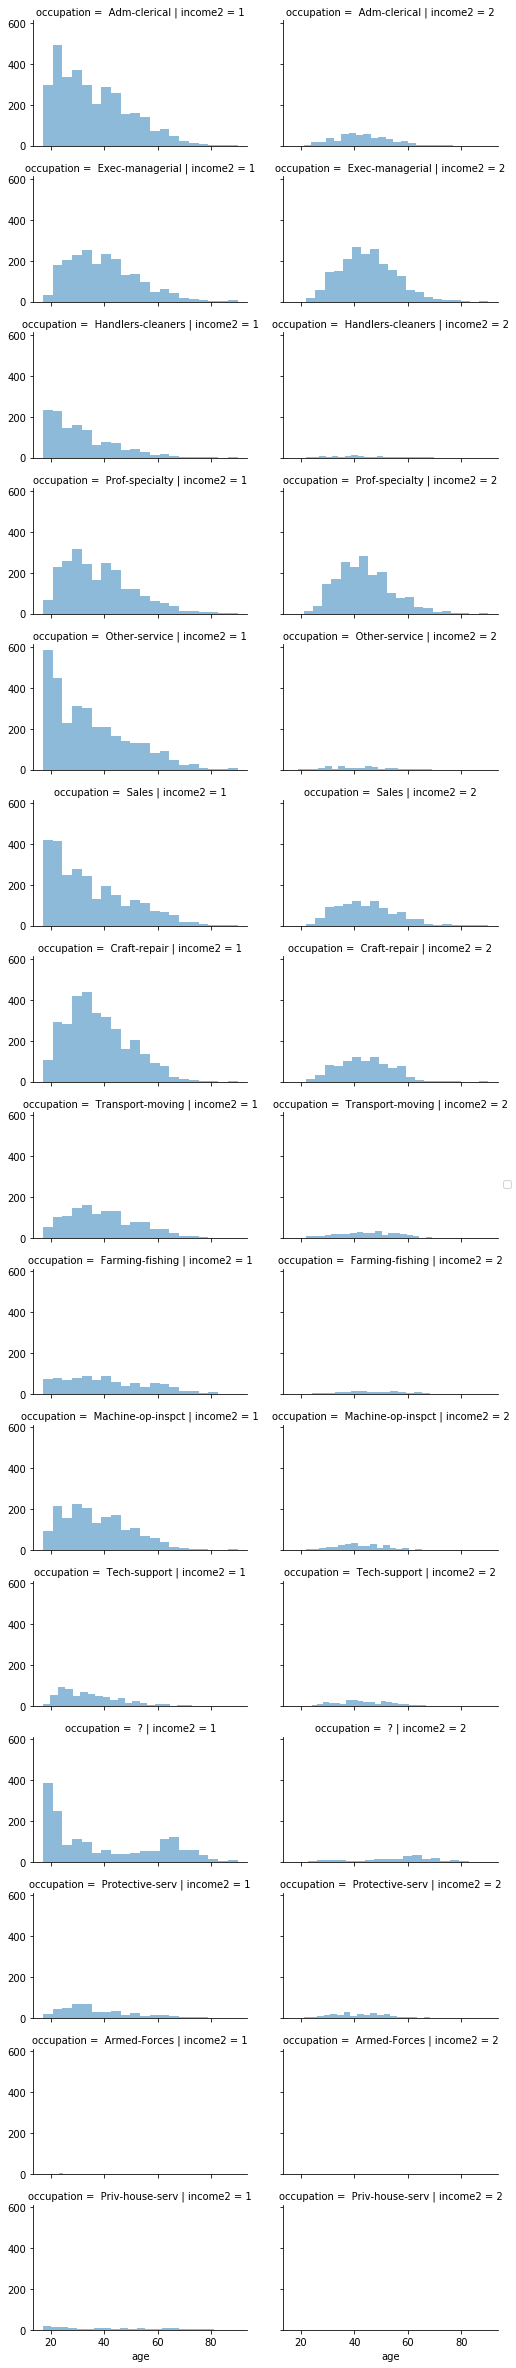

In [193]:
grid = sns.FacetGrid(orig_data, col='income2', row='occupation', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**7. relationship**

 Not-in-family 1                             
 Husband 2                             
 Wife    3                             
 Own-child 4                             
 Unmarried 5                             
 Other-relative 6                             


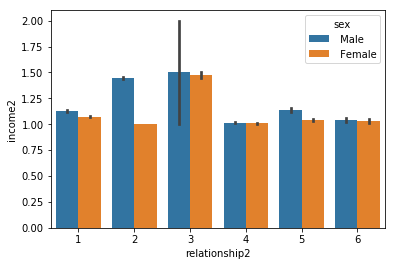

In [198]:
sns.barplot(x='relationship2', y='income2', data=orig_data, hue='sex')
for keys in relationship:
    label = relationship[keys]
    print("{:<8} {:<30}".format(keys, label))

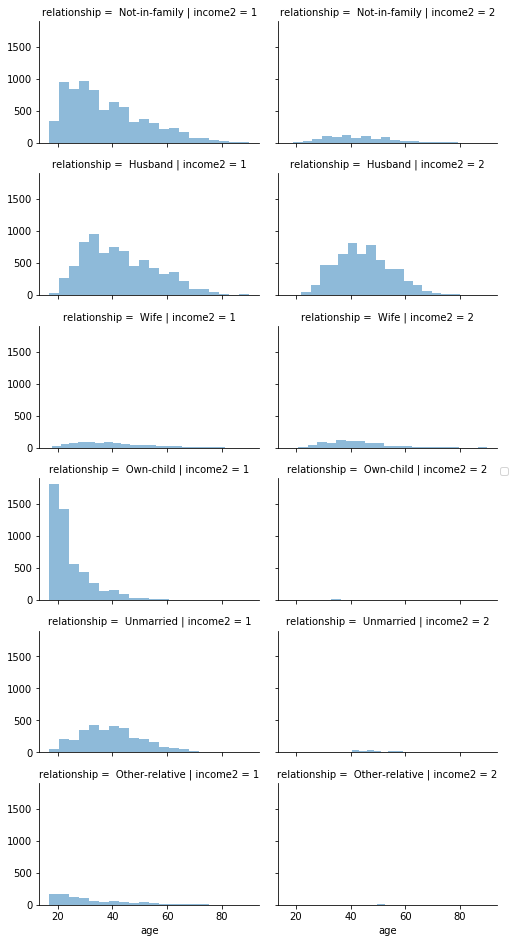

In [195]:
grid = sns.FacetGrid(orig_data, col='income2', row='relationship', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**8. race**

 White   1                             
 Black   2                             
 Asian-Pac-Islander 3                             
 Amer-Indian-Eskimo 4                             
 Other   5                             


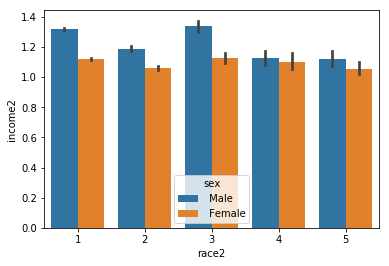

In [199]:
sns.barplot(x='race2', y='income2', data=orig_data, hue='sex')
for keys in race:
    label = race[keys]
    print("{:<8} {:<30}".format(keys, label))

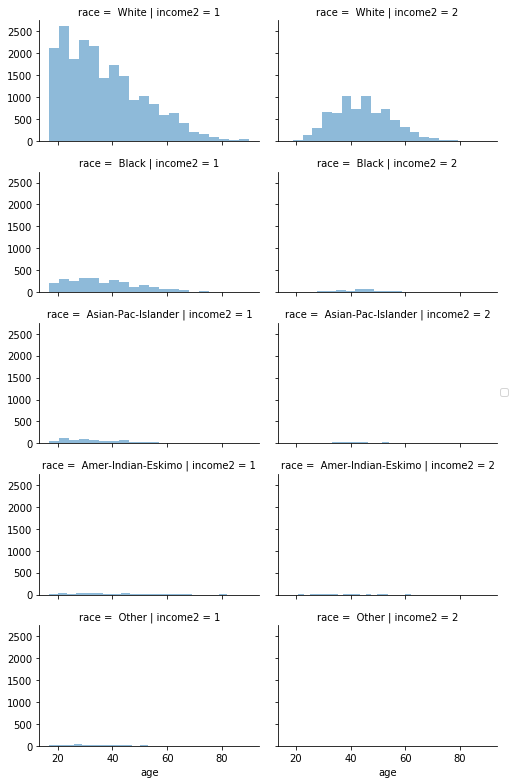

In [200]:
grid = sns.FacetGrid(orig_data, col='income2', row='race', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**9. sex**

 Male    1                             
 Female  2                             


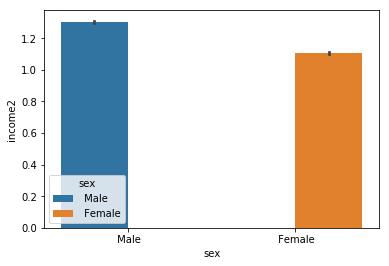

In [201]:
sns.barplot(x='sex', y='income2', data=orig_data, hue='sex')
for keys in sex:
    label = sex[keys]
    print("{:<8} {:<30}".format(keys, label))

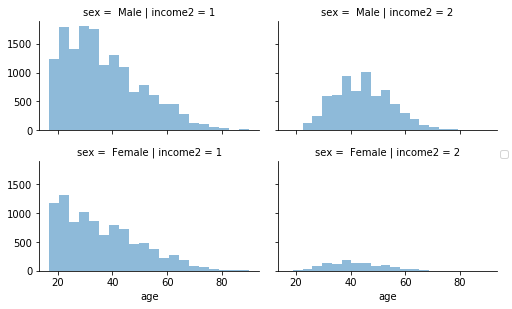

In [202]:
grid = sns.FacetGrid(orig_data, col='income2', row='sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [3]:
# TODO: Total number of records
n_records = len(orig_data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(orig_data[orig_data.income==' >50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(orig_data[orig_data.income==' <=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/n_records*100.0

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 32561
Individuals making more than $50,000: 7841
Individuals making at most $50,000: 24720
Percentage of individuals making more than $50,000: 24.08%


# Data Preprocessing

In [48]:
# Drop "fnlwgt" from the dataset, because it does not contribute to predicting a persons income. 
orig_data = orig_data.drop(['fnlwgt'], axis=1)

In [95]:
# workclass:
workclass = {' State-gov':1, ' Self-emp-not-inc':2, ' Private':3, ' Federal-gov':4,
       ' Local-gov':5, ' ?':6, ' Self-emp-inc':7, ' Without-pay':8,
       ' Never-worked':9}
orig_data['workclass2'] = orig_data['workclass'].map(workclass)

# education_level:
education_level = {' Bachelors':1, ' HS-grad':2, ' 11th':3, ' Masters':4, ' 9th':5,
       ' Some-college':6, ' Assoc-acdm':7, ' Assoc-voc':8, ' 7th-8th':9,
       ' Doctorate':10, ' Prof-school':11, ' 5th-6th':12, ' 10th':13, ' 1st-4th':14,
       ' Preschool':15, ' 12th':16}
orig_data['education_level2'] = orig_data['education_level'].map(education_level)

# marital-status:
marital_status = {' Never-married':1, ' Married-civ-spouse':2, ' Divorced':3,
       ' Married-spouse-absent':4, ' Separated':5, ' Married-AF-spouse':6,
       ' Widowed':7}
orig_data['marital_status2'] = orig_data['marital-status'].map(marital_status)

# occupation:
occupation = {' Adm-clerical':1, ' Exec-managerial':2, ' Handlers-cleaners':3,
       ' Prof-specialty':4, ' Other-service':5, ' Sales':6, ' Craft-repair':7,
       ' Transport-moving':8, ' Farming-fishing':9, ' Machine-op-inspct':10,
       ' Tech-support':11, ' ?':12, ' Protective-serv':13, ' Armed-Forces':14,
       ' Priv-house-serv':15}
orig_data['occupation2'] = orig_data['occupation'].map(occupation)

# relationship:
relationship = {' Not-in-family':1, ' Husband':2, ' Wife':3, ' Own-child':4, ' Unmarried':5,
       ' Other-relative':6}
orig_data['relationship2'] = orig_data['relationship'].map(relationship)

# race:
race = {' White':1, ' Black':2, ' Asian-Pac-Islander':3, ' Amer-Indian-Eskimo':4,
       ' Other':5}
orig_data['race2'] = orig_data['race'].map(race)

# sex:
sex = {' Male':1, ' Female':2}
orig_data['sex2'] = orig_data['sex'].map(sex)

# native-country:
native_country = {' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' ?':6, ' Mexico':7,
       ' South':8, ' Puerto-Rico':9, ' Honduras':10, ' England':11, ' Canada':12,
       ' Germany':13, ' Iran':14, ' Philippines':15, ' Italy':16, ' Poland':17,
       ' Columbia':18, ' Cambodia':19, ' Thailand':20, ' Ecuador':21, ' Laos':22,
       ' Taiwan':23, ' Haiti':24, ' Portugal':25, ' Dominican-Republic':26,
       ' El-Salvador':27, ' France':28, ' Guatemala':29, ' China':30, ' Japan':31,
       ' Yugoslavia':32, ' Peru':33, ' Outlying-US(Guam-USVI-etc)':34, ' Scotland':35,
       ' Trinadad&Tobago':36, ' Greece':37, ' Nicaragua':38, ' Vietnam':39, ' Hong':40,
       ' Ireland':41, ' Hungary':42, ' Holand-Netherlands':43}
orig_data['native-country2'] = orig_data['native-country'].map(native_country)

# workclass:
income = {' <=50K':1, ' >50K':2}
orig_data['income2'] = orig_data['income'].map(income)

#### Workclass:

In [74]:
orig_data.groupby('workclass')['workclass'].count()

workclass
 ?                    1836
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
Name: workclass, dtype: int64

Since the workclass feature has 1836 missing values, we will need to figure out how to fill these 

## Converting Features

The following features need to be converted: 
workclass, education_level, marital-status, occupation, relationship, race, sex, native-country, and income 

## Creating Categories

In [129]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
age_group = ['0_10', '11_20', '21_30', '31_40','41_50', '51_60', '61_70', '71_100']
orig_data['age_cat'] = pd.cut(orig_data['age'], bins, labels=age_group)

In [ ]:
# education_level



In [ ]:
# education-num



In [ ]:
# marital-status



In [ ]:
# occupation



In [ ]:
# relationship



In [ ]:
# race



In [ ]:
# sex



In [ ]:
# capital-gain



In [ ]:
# capital-loss



In [ ]:
# hours-per-week



In [ ]:
# native-countr